# Week 4 Quiz

## Jayat Gonzalez Palomeras - jeg2253

### Due Friday Oct 3rd 11:59pm ET

### Instructions

Replace the Name and UNI in cell above and the notebook filename

Replace all '____' below using the instructions provided.

When completed, 
 1. make sure you've replaced Name and UNI in the first cell and filename
 2. Kernel -> Restart & Run All to run all cells in order 
 3. Print Preview -> Print (Landscape Layout) -> Save to pdf 
 4. post pdf to GradeScope

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_style('darkgrid')

%matplotlib inline

In this quiz we'll calculate a 95% confidence interval for the mean value of 'flavanoids' from the wine dataset.

In [2]:
#1. Read in ../data/wine_dataset.csv as df
df = pd.read_csv('../data/wine_dataset.csv')

# print .info() on df for a summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

/var/folders/x9/j9tkb00j5_11vh0j8q2xmbqr0000gn/T/ipykernel_6805/1613318295.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(y=['flavanoids'], ci= 95)


Text(0.5, 1.0, '95% CI for Mean Flavanoids')

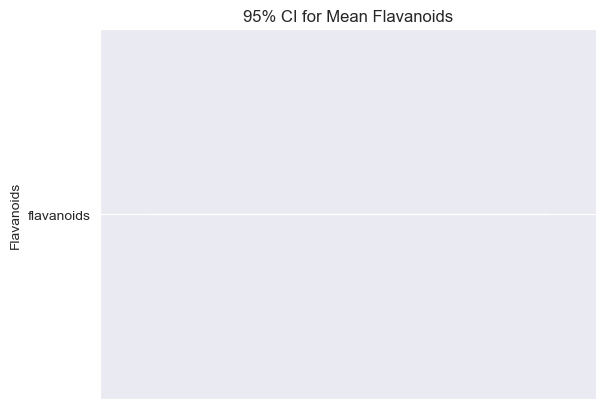

In [10]:
#2. Generate a barplot of the 'flavenoids' column with 95% confidence intervals using sns.barplot()
# These are the CI values we're going to calculate below.
# Capture the axis of the plot in ax
ax = sns.barplot(y=['flavanoids'], ci= 95)

ax.set_ylabel('Flavanoids')
ax.set_xlabel('')
ax.set_title('95% CI for Mean Flavanoids')

In [11]:
#3. Assign the mean value of flavanoids to variable observed_mean
observed_mean = df['flavanoids'].mean()

# Print the observed mean with a precision of 2
observed_mean.round(2)

2.03

In [12]:
# generate a bootstrap sample of df.flavanoids (with the same number of values as the original dataset)
#   using .sample() (with replacement) 
#   using random_state=0 so our answers will match
#   assign the result to sample
sample = df['flavanoids'].sample(
    n = len(df),
    replace = True,
    random_state=0
)

# Print the mean of the sample with a precision of 2
# Note: if the sample mean is the same as the observed mean, 
#       check: are you sampling with replacement?
sample.mean().round(2)

2.16

In [13]:
#4. Generate 1000 additional sample means using bootstrap sampling from the 'flavanoids' column
#   each sample should have the same number of values as the original dataframe
#   sample with replacement
#   do not use random_state for this step (your results may differ from the course solution slightly)
#   store in the list sample_means
sample_means = []
for i in range(1000):
    bootstrap = df['flavanoids'].sample(
        n = len(df),
        replace=True
    )

    sample_means.append(bootstrap.mean())

# Print the first 5 values in sample_means
sample_means[:5]

[2.148258426966292,
 2.082134831460674,
 2.1139887640449437,
 1.9082584269662919,
 1.855505617977528]

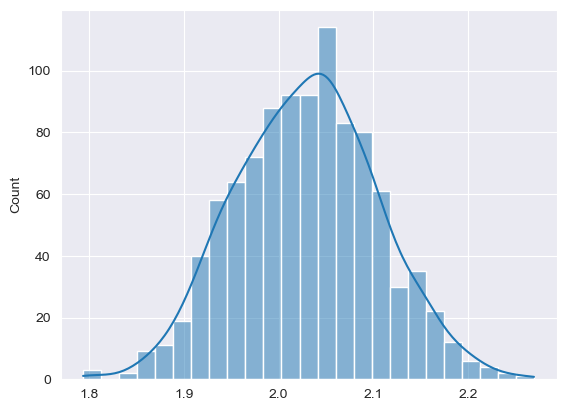

In [16]:
#5. Plot the distribution of sample means using sns.histplot()
sample_means_plot = sns.histplot(sample_means, bins = 25, kde=True)